In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_links = pd.read_csv('./data/ml-latest-small/links.csv')
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [3]:
df_movies = pd.read_csv('./data/ml-latest-small/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [62]:
df_movies.shape

(9742, 3)

In [4]:
df_ratings = pd.read_csv('./data/ml-latest-small/ratings.csv')
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
df_tags = pd.read_csv('./data/ml-latest-small/tags.csv')
df_tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
df = pd.merge(df_ratings, df_movies, on="movieId")
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [7]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
avg_rating = pd.DataFrame(df.groupby("title")["rating"].mean())
avg_rating.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [14]:
avg_rating["number_ratings"] = df.groupby("title")["rating"].count()
avg_rating.head()

,rating,number_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


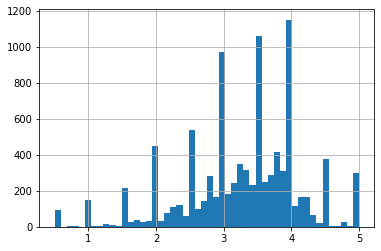

In [16]:
%matplotlib inline
avg_rating['rating'].hist(bins=50)

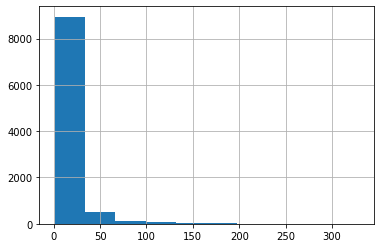

In [18]:
avg_rating["number_ratings"].hist(bins=10)

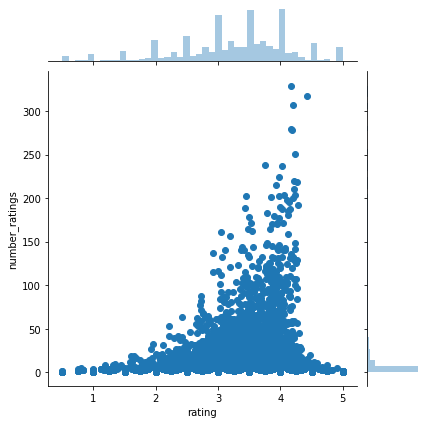

In [22]:
import seaborn as sns
sns.jointplot(x='rating', y='number_ratings', data=avg_rating)

In [23]:
matrix = df.pivot_table(index="userId", columns="title", values="rating")
matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
avg_rating.sort_values("number_ratings", ascending=False).head(10)

,rating,number_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [32]:
afo_user_rating = matrix["Air Force One (1997)"]
c_user_rating = matrix["Contact (1997)"]

afo_user_rating.head(), c_user_rating.head()

(userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Air Force One (1997), dtype: float64,
 userId
 1   NaN
 2   NaN
 3   NaN
 4   NaN
 5   NaN
 Name: Contact (1997), dtype: float64)

In [46]:
similar_to_afo = matrix.corrwith(afo_user_rating)

In [40]:
similar_to_afo

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.129099
xXx (2002)                                  -0.188006
xXx: State of the Union (2005)                    NaN
¡Three Amigos! (1986)                       -0.187477
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [42]:
similar_to_contact = matrix.corrwith(c_user_rating)

In [43]:
similar_to_contact

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                             -0.068793
xXx (2002)                                  -0.300000
xXx: State of the Union (2005)                    NaN
¡Three Amigos! (1986)                        0.326414
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [51]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,correlation
title,
"'burbs, The (1989)",0.486761
(500) Days of Summer (2009),0.634064
*batteries not included (1987),0.868599
...And Justice for All (1979),1.000000
10 Things I Hate About You (1999),-0.102640


In [47]:
corr_AFO = pd.DataFrame(similar_to_afo, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [53]:
corr_AFO = corr_AFO.join(avg_rating['number_ratings'])
corr_contact = corr_contact.join(avg_rating['number_ratings'])

In [54]:
corr_AFO.head()

,correlation,number_ratings
title,,
"'burbs, The (1989)",0.168459,17
(500) Days of Summer (2009),0.086874,42
*batteries not included (1987),-0.866025,7
10 Cloverfield Lane (2016),0.192450,14
10 Items or Less (2006),-1.000000,3


In [55]:
corr_contact.head()

,correlation,number_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [57]:
corr_AFO[corr_AFO['number_ratings'] > 100].sort_values(by='correlation', ascending=False).head()

,correlation,number_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107


In [58]:
corr_contact[corr_contact['number_ratings'] > 100].sort_values(by='correlation', ascending=False).head()

,correlation,number_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112


### Simple item-based collaborative filtering

In [36]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [74]:
df[df['title'] == 'Iron Man (2008)']['movieId']

47108    59315
47109    59315
47110    59315
47111    59315
47112    59315
         ...  
47197    59315
47198    59315
47199    59315
47200    59315
47201    59315
Name: movieId, Length: 94, dtype: int64

In [37]:
movie_profile = df.groupby("movieId")["userId"].apply(list)
movie_profile.head()

movieId
1    [1, 5, 7, 15, 17, 18, 19, 21, 27, 31, 32, 33, ...
2    [6, 8, 18, 19, 20, 21, 27, 51, 62, 68, 82, 91,...
3    [1, 6, 19, 32, 42, 43, 44, 51, 58, 64, 68, 91,...
4                      [6, 14, 84, 162, 262, 411, 600]
5    [6, 31, 43, 45, 58, 66, 68, 84, 103, 107, 111,...
Name: userId, dtype: object

In [38]:
from scipy.spatial import distance
from sklearn.metrics.pairwise import cosine_similarity

In [39]:
df_movie_profile = df.pivot_table(index="movieId", columns="userId", values="rating")
df_movie_profile.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_movie_profile.shape

(9724, 610)

In [41]:
df_movie_profile.dropna(axis=1, how="all", inplace=True)
df_movie_profile.shape

(9724, 610)

In [42]:
df_movie_profile_norm = df_movie_profile.apply(lambda x: x - np.nanmean(x), axis=1)
df_movie_profile_norm.fillna(0, inplace=True)
df_movie_profile_norm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.079070,0.0,0.0,0.0,0.07907,0.000000,0.57907,0.000000,0.0,0.0,...,0.07907,0.000000,0.07907,-0.920930,0.079070,-1.42093,0.07907,-1.420930,-0.92093,1.07907
2,0.000000,0.0,0.0,0.0,0.00000,0.568182,0.00000,0.568182,0.0,0.0,...,0.00000,0.568182,0.00000,1.568182,0.068182,0.00000,0.00000,-1.431818,0.00000,0.00000
3,0.740385,0.0,0.0,0.0,0.00000,1.740385,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,-1.259615,0.00000,0.00000
4,0.000000,0.0,0.0,0.0,0.00000,0.642857,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000
5,0.000000,0.0,0.0,0.0,0.00000,1.928571,0.00000,0.000000,0.0,0.0,...,0.00000,0.000000,0.00000,-0.071429,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000


In [43]:
df_item_similar_cos = pd.DataFrame(cosine_similarity(df_movie_profile_norm, df_movie_profile_norm), 
                                  index=df_movie_profile_norm.index, columns=df_movie_profile_norm.index)
df_item_similar_cos.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.139649,0.113850,0.032658,0.076230,0.037291,0.064268,0.085986,0.041389,-0.008184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.139649,1.000000,0.187303,-0.016897,0.154411,0.067458,0.067552,0.031078,0.046682,0.007021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113850,0.187303,1.000000,0.071153,0.220868,0.185618,0.195055,0.188311,0.160743,-0.010144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.032658,-0.016897,0.071153,1.000000,0.128339,0.004044,0.022439,0.012922,0.000000,0.076458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.076230,0.154411,0.220868,0.128339,1.000000,0.080362,0.217156,0.224129,0.070375,0.047833,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_item_similar_cos.shape

(9724, 9724)

In [44]:
def get_similar_movie(movieId):
    if movieId not in df_item_similar_cos.index:
        return None, None
    sim_movies = df_item_similar_cos.sort_values(by=movieId, ascending=False).index[1:]
    sim_scores = df_item_similar_cos.sort_values(by=movieId, ascending=False).loc[:, movieId].tolist()[1:]
    return sim_movies, sim_scores

In [76]:
mId = 59315
animes, score = get_similar_movie(mId)
print(f"The similar movie of {df_movies.loc[df_movies['movieId'] == mId, 'title'].values[0]} (id {mId})")
for x,y in zip(animes[:10], score[:10]):
    print("{} (id {}) with similarity of {}".format(df_movies.loc[df_movies['movieId'] == x, 'title'].values[0], 
                                                    x, 
                                                    y))

The similar movie of Iron Man (2008) (id 59315)
Star Trek (2009) (id 68358) with similarity of 0.44978841068901154
Iron Man 2 (2010) (id 77561) with similarity of 0.4169514711781499
District 9 (2009) (id 70286) with similarity of 0.3838134884640211
Ratatouille (2007) (id 50872) with similarity of 0.37750847863996245
Charlie Wilson's War (2007) (id 56788) with similarity of 0.37390557155652115
Grindhouse (2007) (id 52281) with similarity of 0.3730417214516643
Man on Wire (2008) (id 60766) with similarity of 0.35192474842190147
Serious Man, A (2009) (id 71464) with similarity of 0.32576893049563904
Dark Knight, The (2008) (id 58559) with similarity of 0.32070251315278775
Avengers, The (2012) (id 89745) with similarity of 0.3189852351225332


In [71]:
df_movies.loc[df_movies['movieId'] == 193609, 'title'].values[0]

'Andrew Dice Clay: Dice Rules (1991)'

### Amazon item-based collaborative filtering
https://www.cs.umd.edu/~samir/498/Amazon-Recommendations.pdf

In [8]:
rating_mean= df.groupby(['movieId'], as_index = False, sort = False).mean().rename(columns = {'rating': 'rating_mean'})[['movieId','rating_mean']]
adjusted_ratings = pd.merge(df,rating_mean,on = 'movieId', how = 'left', sort = False)
adjusted_ratings['rating_adjusted']=adjusted_ratings['rating']-adjusted_ratings['rating_mean']
# replace 0 adjusted rating values to 1*e-8 in order to avoid 0 denominator
adjusted_ratings.loc[adjusted_ratings['rating_adjusted'] == 0, 'rating_adjusted'] = 1e-8
adjusted_ratings.head()

,userId,movieId,rating,timestamp,title,genres,rating_mean,rating_adjusted
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0.07907
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0.07907
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0.57907
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,-1.42093
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92093,0.57907


### Pseudo-result
This image presents the result in one loop **before** we calculate the similarity
![title](image/amazon-item-to-item-collaborative-filtering.png)

In [72]:
def build_matrix(adjusted_ratings):
    w_matrix_columns = ['movie_1', 'movie_2', 'weight']
    w_matrix=pd.DataFrame(columns=w_matrix_columns)
    
    # get all movies in DB
    distinct_movies = np.unique(adjusted_ratings['movieId'])
    i = 0
    
    # for each movie_1 in all movies
    for movie_1 in distinct_movies:
        if i%10==0:
            print(i , "out of ", len(distinct_movies))
        
        # get all info about the movie_1
        user_data = adjusted_ratings[adjusted_ratings['movieId'] == movie_1]
        
        # get all (distinct) users who rate the movie_1
        distinct_users = np.unique(user_data['userId'])
        
        # create DataFrame what records the ratings for users who rated both movie_1 and movie_2
        record_row_columns = ['userId', 'movie_1', 'movie_2', 'rating_adjusted_1', 'rating_adjusted_2']
        record_movie_1_2 = pd.DataFrame(columns=record_row_columns)
        
        # for each customer C who rated movie_1
        for c_userid in distinct_users:
            #print('build weight matrix for customer %d, movie_1 %d' % (c_userid, movie_1))
            
            # get the rating of c_userid for movie_1
            c_movie_1_rating = user_data[user_data['userId'] == c_userid]['rating_adjusted'].iloc[0]
            
            # extract movies rated by c_userid excluding movie_1
            c_user_data = adjusted_ratings[(adjusted_ratings['userId'] == c_userid) & 
                                           (adjusted_ratings['movieId'] != movie_1)]
            
            # get all (distinct) movies rated by c_userid excluding movie_1
            c_distinct_movies = np.unique(c_user_data['movieId'])
            #print(f"c_distinct_movies {c_distinct_movies}")
            
            # for each movie rated by customer C as movie=2
            for movie_2 in c_distinct_movies:
                # get the rating of c_userid for movie_2
                c_movie_2_rating = c_user_data[c_user_data['movieId'] == movie_2]['rating_adjusted'].iloc[0]
                
                # create a record (Series): userid, movie_1, movie_2, rating_userid_movie_1, rating_userid_movie_2
                record_row = pd.Series([c_userid, movie_1, movie_2, c_movie_1_rating, c_movie_2_rating], 
                                       index=record_row_columns)
                
                # append the record into the DataFrame result
                record_movie_1_2 = record_movie_1_2.append(record_row, ignore_index=True)
                
            print(f"record_movie_1_2 {record_movie_1_2}")
            print(f"{np.unique(record_movie_1_2['userId'])}")
            break
            
        # calculate the similarity values between movie_1 and the above recorded movies
        # TODO: this calculation below seems like NOT GOOD ???
        distinct_movie_2 = np.unique(record_movie_1_2['movie_2'])
        
        # for each movie 2
        for movie_2 in distinct_movie_2:
            #print('calculate weight movie_1 %d, movie_2 %d' % (movie_1, movie_2))
            # get record of pair movie_1 - movie_2
            paired_movie_1_2 = record_movie_1_2[record_movie_1_2['movie_2'] == movie_2]
            
            # calculate the numerator
            sim_value_numerator = (paired_movie_1_2['rating_adjusted_1'] * 
                                   paired_movie_1_2['rating_adjusted_2']).sum()
            
            # calculate the denominator
            sim_value_denominator = np.sqrt(np.square(paired_movie_1_2['rating_adjusted_1']).sum()) * \
                                    np.sqrt(np.square(paired_movie_1_2['rating_adjusted_2']).sum())
            sim_value_denominator = sim_value_denominator if sim_value_denominator != 0 else 1e-8
            
            # calculate the final
            sim_value = sim_value_numerator / sim_value_denominator
            
            # append the record: movie_1 - movie_2 - sim_value into the matrix result
            w_matrix = w_matrix.append(pd.Series([movie_1, movie_2, sim_value], 
                                                 index=w_matrix_columns), ignore_index=True)
            print(f"paired_movie_1_2 {paired_movie_1_2}")
            print(f"sim_value_numerator {sim_value_numerator}")
            print(f"sim_value_denominator {sim_value_denominator}")
            print(f"sim_value {sim_value}")
            print(f"w_matrix {w_matrix}")
        break
        i = i + 1
        
    return w_matrix

In [73]:
#sample = adjusted_ratings.loc[np.random.permutation(adjusted_ratings.index)[:1000]]
matrix = build_matrix(adjusted_ratings)

0 out of  9724
record_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
0       1.0      1.0      3.0            0.07907           0.740385
1       1.0      1.0      6.0            0.07907           0.053922
2       1.0      1.0     47.0            0.07907           1.024631
3       1.0      1.0     50.0            0.07907           0.762255
4       1.0      1.0     70.0            0.07907          -0.509091
..      ...      ...      ...                ...                ...
226     1.0      1.0   3744.0            0.07907           1.342105
227     1.0      1.0   3793.0            0.07907           1.300752
228     1.0      1.0   3809.0            0.07907           0.728571
229     1.0      1.0   4006.0            0.07907           0.642857
230     1.0      1.0   5060.0            0.07907           1.065217

[231 rows x 5 columns]
[1.]
paired_movie_1_2    userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
0     1.0      1.0      3.0            0

15     1.0      1.0    296.0            0.07907          -1.197068
sim_value_numerator -0.09465192030906737
sim_value_denominator 0.09465192030906737
sim_value -1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
5       1.0    101.0     1.0
6       1.0    110.0    -1.0
7       1.0    151.0     1.0
8       1.0    157.0     1.0
9       1.0    163.0     1.0
10      1.0    216.0     1.0
11      1.0    223.0    -1.0
12      1.0    231.0     1.0
13      1.0    235.0     1.0
14      1.0    260.0     1.0
15      1.0    296.0    -1.0
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
16     1.0      1.0    316.0            0.07907             -0.375
sim_value_numerator -0.029651162790697627
sim_value_denominator 0.029651162790697627
sim_value -1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0    

25      1.0    480.0     1.0
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
26     1.0      1.0    500.0            0.07907          -0.388889
sim_value_numerator -0.030749354005167907
sim_value_denominator 0.030749354005167907
sim_value -1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
5       1.0    101.0     1.0
6       1.0    110.0    -1.0
7       1.0    151.0     1.0
8       1.0    157.0     1.0
9       1.0    163.0     1.0
10      1.0    216.0     1.0
11      1.0    223.0    -1.0
12      1.0    231.0     1.0
13      1.0    235.0     1.0
14      1.0    260.0     1.0
15      1.0    296.0    -1.0
16      1.0    316.0    -1.0
17      1.0    333.0     1.0
18      1.0    349.0     1.0
19      1.0    356.0    -1.0
20      1.0    362.0     1.0
21      1.0    367.0     1.0
22      1.0    423.0     1.0
23      1.0    

34      1.0    596.0     1.0
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
35     1.0      1.0    608.0            0.07907           0.883978
sim_value_numerator 0.06989592702042906
sim_value_denominator 0.06989592702042906
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
5       1.0    101.0     1.0
6       1.0    110.0    -1.0
7       1.0    151.0     1.0
8       1.0    157.0     1.0
9       1.0    163.0     1.0
10      1.0    216.0     1.0
11      1.0    223.0    -1.0
12      1.0    231.0     1.0
13      1.0    235.0     1.0
14      1.0    260.0     1.0
15      1.0    296.0    -1.0
16      1.0    316.0    -1.0
17      1.0    333.0     1.0
18      1.0    349.0     1.0
19      1.0    356.0    -1.0
20      1.0    362.0     1.0
21      1.0    367.0     1.0
22      1.0    423.0     1.0
23      1.0    441.

sim_value_numerator 0.07248062015503867
sim_value_denominator 0.07248062015503867
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
5       1.0    101.0     1.0
6       1.0    110.0    -1.0
7       1.0    151.0     1.0
8       1.0    157.0     1.0
9       1.0    163.0     1.0
10      1.0    216.0     1.0
11      1.0    223.0    -1.0
12      1.0    231.0     1.0
13      1.0    235.0     1.0
14      1.0    260.0     1.0
15      1.0    296.0    -1.0
16      1.0    316.0    -1.0
17      1.0    333.0     1.0
18      1.0    349.0     1.0
19      1.0    356.0    -1.0
20      1.0    362.0     1.0
21      1.0    367.0     1.0
22      1.0    423.0     1.0
23      1.0    441.0     1.0
24      1.0    457.0     1.0
25      1.0    480.0     1.0
26      1.0    500.0    -1.0
27      1.0    527.0     1.0
28      1.0    543.0     1.0
29      1.0    552.0     

w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
58      1.0   1060.0     1.0
59      1.0   1073.0     1.0
60      1.0   1080.0     1.0
61      1.0   1089.0     1.0
62      1.0   1090.0     1.0

[63 rows x 3 columns]
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
63     1.0      1.0   1092.0            0.07907           1.808511
sim_value_numerator 0.14299851558634316
sim_value_denominator 0.14299851558634316
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
59      1.0   1073.0     1.0
60      1.0   1080.0     1.0
61      1.0   1089.0     1.0
62      1.0   1090.0     1.0
63      1.0   1092.0     1.0

[64 rows x 3 co

sim_value_numerator 0.11860465116279051
sim_value_denominator 0.11860465116279051
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
75      1.0   1219.0    -1.0
76      1.0   1220.0     1.0
77      1.0   1222.0     1.0
78      1.0   1224.0     1.0
79      1.0   1226.0     1.0

[80 rows x 3 columns]
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
80     1.0      1.0   1240.0            0.07907           1.103053
sim_value_numerator 0.08721817859044899
sim_value_denominator 0.08721817859044899
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
76      1.0   1220.0     1.0
77      1.0   1222.0     1.0
78     

w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
93      1.0   1408.0    -1.0
94      1.0   1445.0     1.0
95      1.0   1473.0     1.0
96      1.0   1500.0     1.0
97      1.0   1517.0     1.0

[98 rows x 3 columns]
paired_movie_1_2     userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
98     1.0      1.0   1552.0            0.07907           0.966102
sim_value_numerator 0.07638943634213627
sim_value_denominator 0.07638943634213627
sim_value 1.0
w_matrix     movie_1  movie_2  weight
0       1.0      3.0     1.0
1       1.0      6.0     1.0
2       1.0     47.0     1.0
3       1.0     50.0     1.0
4       1.0     70.0    -1.0
..      ...      ...     ...
94      1.0   1445.0     1.0
95      1.0   1473.0     1.0
96      1.0   1500.0     1.0
97      1.0   1517.0     1.0
98      1.0   1552.0     1.0

[99 rows x 3 co

paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
116     1.0      1.0   2000.0            0.07907           0.326667
sim_value_numerator 0.025829457364341044
sim_value_denominator 0.025829457364341044
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
112      1.0   1920.0     1.0
113      1.0   1927.0     1.0
114      1.0   1954.0     1.0
115      1.0   1967.0     1.0
116      1.0   2000.0     1.0

[117 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
117     1.0      1.0   2005.0            0.07907           1.429825
sim_value_numerator 0.11305589555283538
sim_value_denominator 0.11305589555283538
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2       

paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
131     1.0      1.0   2099.0            0.07907           0.583333
sim_value_numerator 0.04612403100775188
sim_value_denominator 0.04612403100775188
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
127      1.0   2090.0     1.0
128      1.0   2093.0     1.0
129      1.0   2094.0     1.0
130      1.0   2096.0     1.0
131      1.0   2099.0     1.0

[132 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
132     1.0      1.0   2105.0            0.07907               0.66
sim_value_numerator 0.05218604651162784
sim_value_denominator 0.05218604651162784
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1

[146 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
146     1.0      1.0   2329.0            0.07907           0.782946
sim_value_numerator 0.06190733729944101
sim_value_denominator 0.06190733729944101
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
142      1.0   2253.0    -1.0
143      1.0   2268.0     1.0
144      1.0   2273.0     1.0
145      1.0   2291.0     1.0
146      1.0   2329.0     1.0

[147 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
147     1.0      1.0   2338.0            0.07907          -0.055556
sim_value_numerator -0.004392764857881115
sim_value_denominator 0.004392764857881115
sim_value -1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0 

sim_value_numerator 0.07191984166254321
sim_value_denominator 0.07191984166254321
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
157      1.0   2459.0     1.0
158      1.0   2470.0     1.0
159      1.0   2478.0     1.0
160      1.0   2492.0     1.0
161      1.0   2502.0     1.0

[162 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
162     1.0      1.0   2528.0            0.07907          -0.229167
sim_value_numerator -0.01812015503875965
sim_value_denominator 0.01812015503875965
sim_value -1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
158      1.0   2470.0     1.0
159      1.

paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
176     1.0      1.0   2657.0            0.07907           -0.34127
sim_value_numerator -0.02698412698412695
sim_value_denominator 0.02698412698412695
sim_value -1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
172      1.0   2641.0     1.0
173      1.0   2644.0     1.0
174      1.0   2648.0     1.0
175      1.0   2654.0     1.0
176      1.0   2657.0    -1.0

[177 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
177     1.0      1.0   2692.0            0.07907                1.0
sim_value_numerator 0.07906976744186034
sim_value_denominator 0.07906976744186034
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2       

sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
187      1.0   2944.0     1.0
188      1.0   2947.0     1.0
189      1.0   2948.0     1.0
190      1.0   2949.0     1.0
191      1.0   2959.0     1.0

[192 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
192     1.0      1.0   2985.0            0.07907           0.628571
sim_value_numerator 0.049700996677740784
sim_value_denominator 0.049700996677740784
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
188      1.0   2947.0     1.0
189      1.0   2948.0     1.0
190      1.0   2949.0     1.0
191      1.0   2959.0     1.0
192

w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
202      1.0   3147.0     1.0
203      1.0   3168.0     1.0
204      1.0   3176.0    -1.0
205      1.0   3243.0     1.0
206      1.0   3247.0    -1.0

[207 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
207     1.0      1.0   3253.0            0.07907            1.52459
sim_value_numerator 0.12054898970644282
sim_value_denominator 0.12054898970644282
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
203      1.0   3168.0     1.0
204      1.0   3176.0    -1.0
205      1.0   3243.0     1.0
206      1.0   3247.0    -1.0
207      1.0   3253

[221 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
221     1.0      1.0   3671.0            0.07907           1.064516
sim_value_numerator 0.08417104276069004
sim_value_denominator 0.08417104276069004
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0      6.0     1.0
2        1.0     47.0     1.0
3        1.0     50.0     1.0
4        1.0     70.0    -1.0
..       ...      ...     ...
217      1.0   3527.0     1.0
218      1.0   3578.0     1.0
219      1.0   3617.0     1.0
220      1.0   3639.0     1.0
221      1.0   3671.0     1.0

[222 rows x 3 columns]
paired_movie_1_2      userId  movie_1  movie_2  rating_adjusted_1  rating_adjusted_2
222     1.0      1.0   3702.0            0.07907           1.513158
sim_value_numerator 0.11964504283965709
sim_value_denominator 0.11964504283965709
sim_value 1.0
w_matrix      movie_1  movie_2  weight
0        1.0      3.0     1.0
1        1.0     

In [12]:
matrix

,movie_1,movie_2,weight
0,1.0,2.0,0.334641
1,1.0,3.0,0.333774
2,1.0,5.0,0.182439
3,1.0,6.0,-0.053141
4,1.0,7.0,0.435812
5,1.0,9.0,-1.000000
6,1.0,10.0,-0.151581
7,1.0,11.0,0.258364
8,1.0,12.0,-1.000000
9,1.0,13.0,-1.000000
